Forward-Backward Sweep
=======

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
N = 20

In [10]:
f = lambda t,x,u: -0.5*x**2 + 5*u
x_0 = 1
g = lambda t,lmbda,x,u: -5 + x*lmbda
lmbda_1 = 0

In [11]:
t = np.linspace(0,1, num=N)
dt = t[1] - t[0]
x = np.zeros_like(t)
dx = x[1] - x[0]
u = np.zeros_like(t)
du = u[1] - u[0]
lmbda = np.zeros_like(t)
dlmbda = lmbda[1] - lmbda[0]

lmbda[-1] = lmbda_1
x[0] = x_0


In [12]:

while True:
    u_old = u
    

    # forward step in Runge-Kutta scheme
    x[0] = x_0
    for i in range(N-1):

        k_1 = f(t[i], x[i], u[i])
        k_2 = f(t[i]+dt/2, x[i]+(dt*k_1)/2, 1/2*(u[i]+u[i+1]))
        k_3 = f(t[i]+dt/2, x[i]+(dt*k_2)/2, 1/2*(u[i]+u[i+1]))
        k_4 = f(t[i]+dt, x[i]+dt*k_3, u[i+1])
        x[i+1] = x[i] + (dt/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)

    
    # backward step in Runge-Kutta scheme
    lmbda[-1] = lmbda_1
    for i in range(N-1):

        j = N-1-i
        k_1 = g(t[j], lmbda[j], x[j], u[j])
        k_2 = g(t[j]-dt/2, lmbda[j]-(dt*k_1)/2, 1/2*(x[j]+x[j-1]), 1/2*(u[j]+u[j-1]))
        k_3 = g(t[j]-dt/2, lmbda[j]-(dt*k_2)/2, 1/2*(x[j]+x[j-1]), 1/2*(u[j]+u[j-1]))
        k_4 = g(t[j]-dt, lmbda[j]-dt*k_3, x[j-1], u[j-1])
        lmbda[j-1] = lmbda[j] - (dt/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)

    u = (5*lmbda)/(2*5)


    residual = np.sum( np.abs(u_old - u) )
    if residual < 1e-5:
        print("Convergence of residual = ", residual)
        break

Convergence of residual =  4.579926715278515e-06


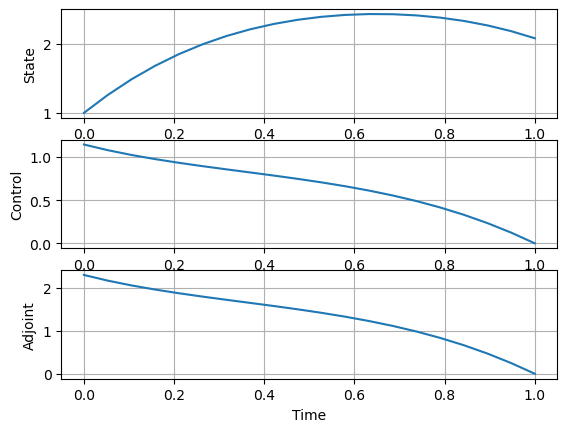

In [13]:
fig, ax = plt.subplots(3)

ax[0].plot(t, x)
ax[0].set(ylabel="State")
ax[0].grid()
ax[1].plot(t, u)
ax[1].set(ylabel="Control")
ax[1].grid()
ax[2].plot(t, lmbda)
ax[2].set(ylabel="Adjoint", xlabel="Time")
plt.grid()

In [7]:
for i in range(N-1):

    j = N-1-i

    print("j = ", j, ", i = ", i)


j =  19 , i =  0
j =  18 , i =  1
j =  17 , i =  2
j =  16 , i =  3
j =  15 , i =  4
j =  14 , i =  5
j =  13 , i =  6
j =  12 , i =  7
j =  11 , i =  8
j =  10 , i =  9
j =  9 , i =  10
j =  8 , i =  11
j =  7 , i =  12
j =  6 , i =  13
j =  5 , i =  14
j =  4 , i =  15
j =  3 , i =  16
j =  2 , i =  17
j =  1 , i =  18
